In [1]:
#import lib
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
#load Data set
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
# normalize the X_train and X_test
X_train = X_train/255
X_test = X_test/255

In [6]:
# Create sequential model
model = Sequential()

# add flatten layer
model.add(Flatten(input_shape=(28,28)))

# Hidden layers
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))

#Output layer
model.add(Dense(10,activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [8]:
# model compilation
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [9]:
# train the model
history = model.fit(X_train,y_train,epochs=30,validation_split=0.3)

Epoch 1/30
1313/1313 [==============================] - 13s 9ms/step - loss: 0.3015 - accuracy: 0.9137 - val_loss: 0.1667 - val_accuracy: 0.9513
Epoch 2/30
1313/1313 [==============================] - 9s 7ms/step - loss: 0.1240 - accuracy: 0.9627 - val_loss: 0.1256 - val_accuracy: 0.9627
Epoch 3/30
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0868 - accuracy: 0.9735 - val_loss: 0.1112 - val_accuracy: 0.9670
Epoch 4/30
1313/1313 [==============================] - 11s 8ms/step - loss: 0.0628 - accuracy: 0.9809 - val_loss: 0.1098 - val_accuracy: 0.9676
Epoch 5/30
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0510 - accuracy: 0.9842 - val_loss: 0.1058 - val_accuracy: 0.9708
Epoch 6/30
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0403 - accuracy: 0.9874 - val_loss: 0.1423 - val_accuracy: 0.9625
Epoch 7/30
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0309 - accuracy: 0.9899 - val_loss: 0.1051 - val_accura

In [10]:
# make prediction on x_test
y_pb = model.predict(X_test)

313/313 [==============================] - 2s 4ms/step


In [11]:
# find prediction
y_pred = y_pb.argmax(axis=1)

In [12]:
# calculate accuracy
accuracy_score(y_test,y_pred)

0.9761

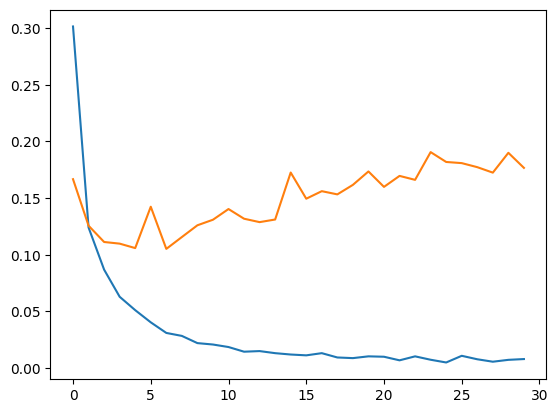

In [13]:
# plot traning loss and test loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

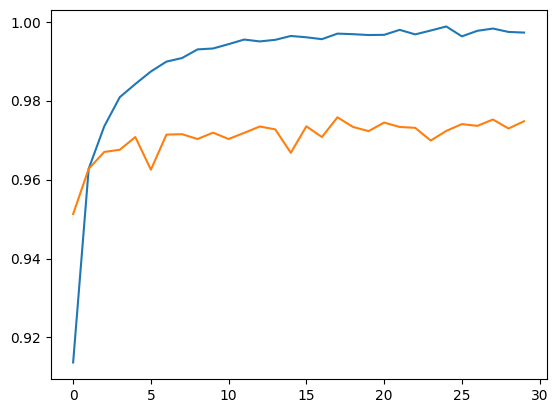

In [14]:
# plot traning accuracy and test accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [15]:
# save the model
model.save('mnist_ann.h5')